In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
def extract_correct_log_info(log):
    # Split the log message by commas and strip whitespace
    parts = [part.strip() for part in log.split(',')]
    # Extract the required parts based on their known positions and content
    robot_id = parts[4]  # Correct index for robotID value
    good_value = parts[6]  # Correct index for goodValue value
    berth_id = parts[8]  # Correct index for berthID value
    current_time = parts[2]  # Correct index for currentTime
    # Return the extracted information as a tuple
    return (robot_id, good_value, berth_id, current_time)

with open("../log/log.log", 'r', encoding='utf-8') as f:
    log_lines = f.readlines()

relevant_log_lines = [line for line in log_lines if "机器人效率统计" in line]
extracted_data = [extract_correct_log_info(line) for line in relevant_log_lines]
extracted_data_int = [(int(robot_id), 
                       int(good_value), 
                       int(berth_id), 
                       int(current_time)) for robot_id, good_value, berth_id, current_time in extracted_data]
df = pd.DataFrame(extracted_data_int, columns=['RobotID', 'GoodValue', 'BerthID', 'CurrentTime'])
df_sorted = df.sort_values(by=['RobotID', 'CurrentTime'])

In [50]:
robot_id_counts = df_sorted['RobotID'].value_counts().sort_index()
total_revenue_by_robot = df_sorted.groupby('RobotID')['GoodValue'].sum()
print("机器人收益统计：")
final_summary = pd.DataFrame({
    'TotalRevenue': total_revenue_by_robot,
    'GoodCount': robot_id_counts,
})
final_summary

机器人收益统计：


,TotalRevenue,GoodCount,efficiency
RobotID,,,
0,29736,158,0.012547
1,26305,144,0.012178
2,29914,159,0.012543
3,27068,145,0.012445
4,25653,136,0.012575
5,26344,139,0.012635
6,28368,152,0.012442
7,28465,153,0.012403
8,28756,152,0.012612


In [48]:
print("泊位收益统计：")
total_revenue_by_berth = df_sorted.groupby('BerthID')['GoodValue'].sum()
total_revenue_by_berth

泊位收益统计：


BerthID
0    22839
1    18875
2    26836
3    40330
4    20262
5    39689
6    35905
7    46730
8    14982
9     9780
Name: GoodValue, dtype: int64

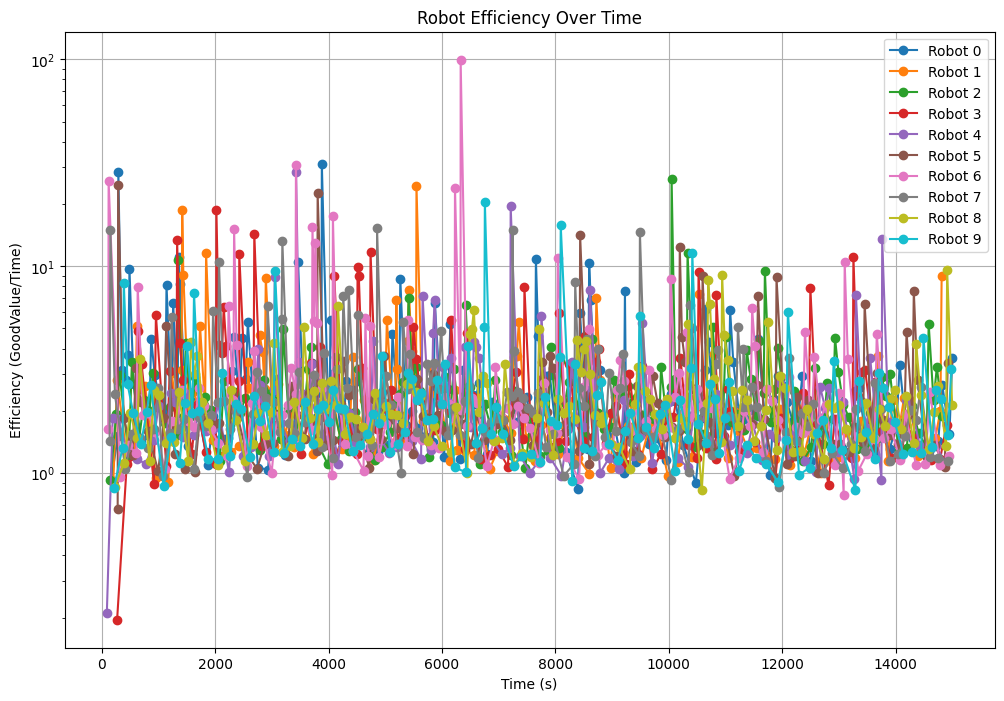

In [44]:
# Now let's plot the efficiency over time for each robot on the same graph
plt.figure(figsize=(12, 8))

for robot_id in df_sorted['RobotID'].unique():
    df_robot = df_sorted[df_sorted['RobotID'] == robot_id]
    plt.plot(df_robot['CurrentTime'], df_robot['Efficiency'], marker='o', linestyle='-', label=f'Robot {robot_id}')

plt.yscale('log')  # Set the Y-axis to logarithmic scale
plt.title('Robot Efficiency Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Efficiency (GoodValue/Time)')
plt.legend()
plt.grid(True)
plt.show()